In [1]:
import sys
sys.path.append('..//')

In [3]:
'..//' not in sys.path

False

In [ ]:
from opmsim import dipole_source


source = dipole_source.DipoleSource()
## source.add_dipoles((0,0))
source.generate_dipoles(500)
source.classical_photoselection((pi/2,0))



cap method area sum 3.5738632007305653
expected area sum 3.5738661731158983
n_dipoles 1
n_rays 583
initial energy shape ()


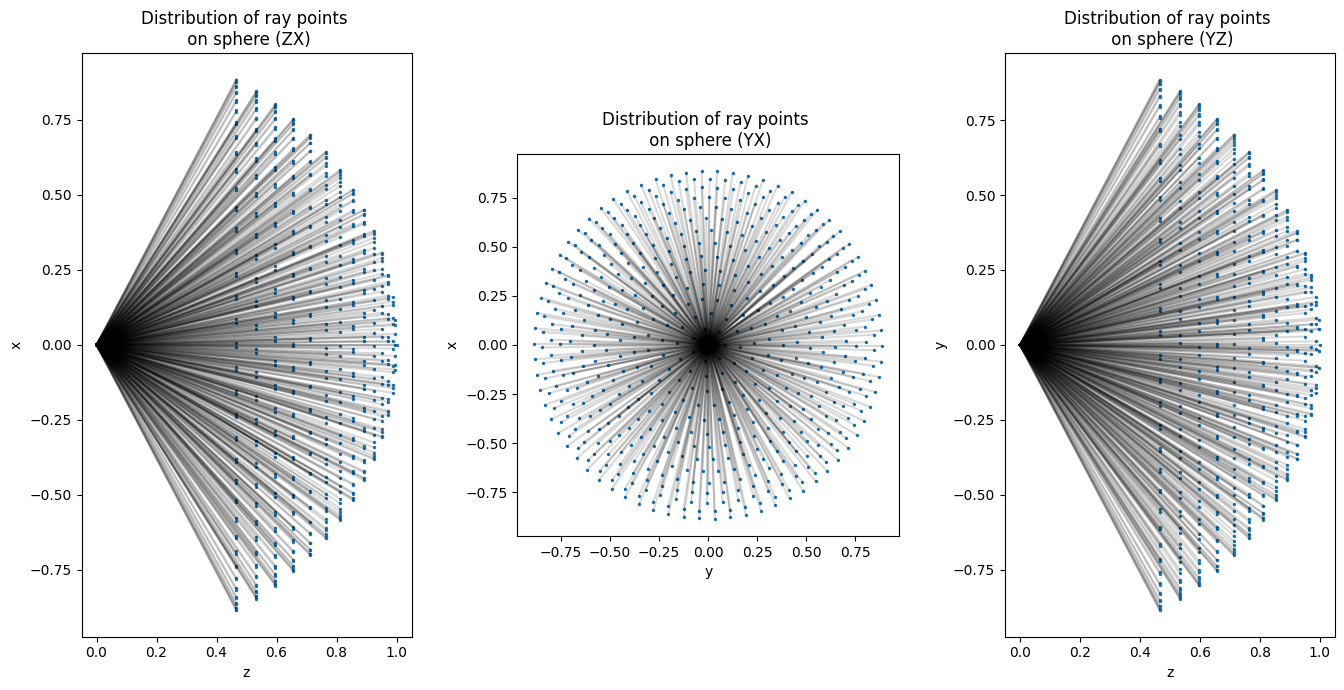

initialisation time in system 1.866814s
Flat pupil
CURVED REFRACTION
FLAT REFRACTION
CURVED REFRACTION
Saved checkpoint with 10000 rays
FLAT REFRACTION
----------------------Electric field before reflection------------------
False
E_vec.shape[1] 583


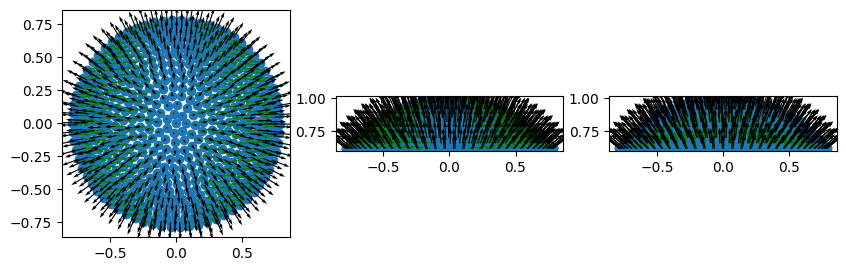

0.30543261909900765
(583, 3)
()
()
(583, 3)
----------------------Electric field after reflection------------------
False
E_vec.shape[1] 583


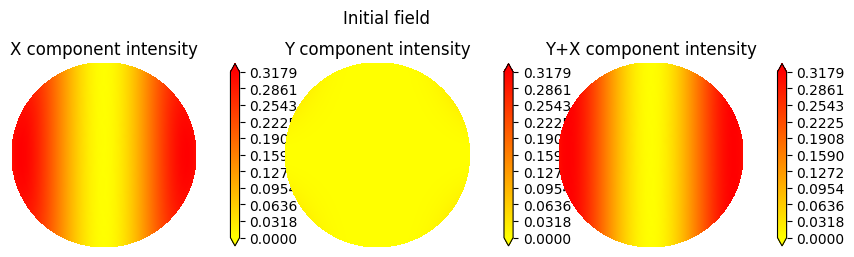

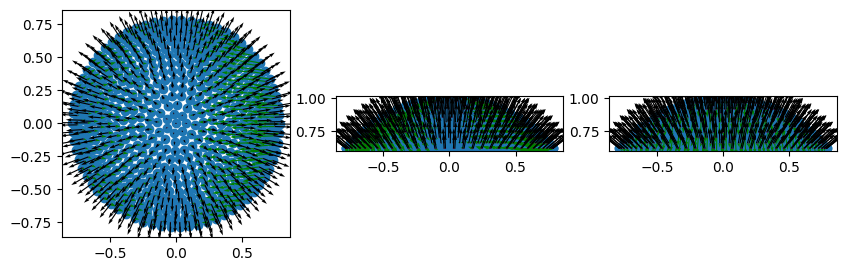

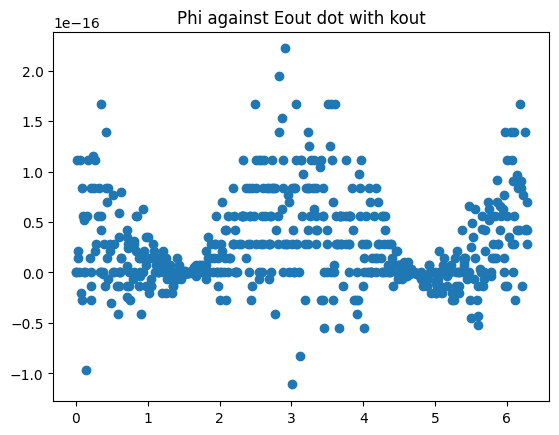

Saved checkpoint with 10000 rays
CURVED REFRACTION
84 escaped from NA mask
Saved checkpoint with 10000 rays


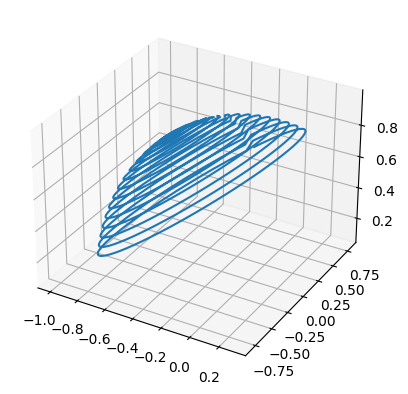

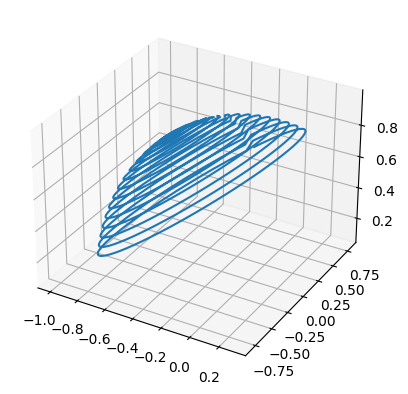

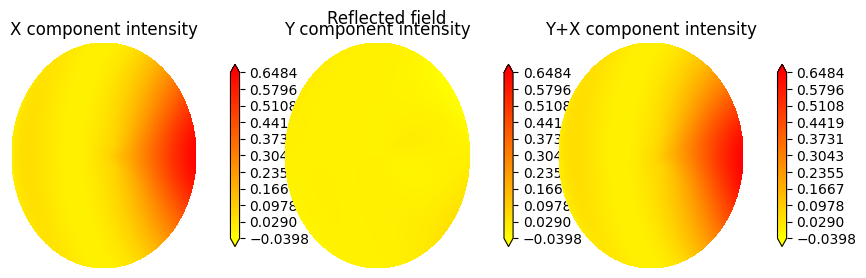

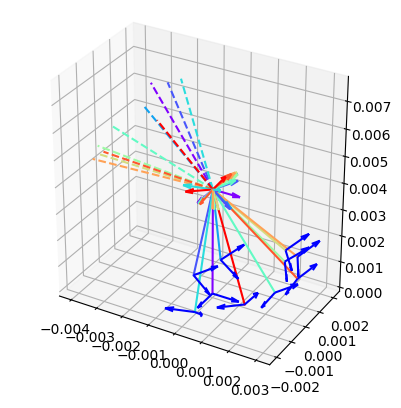

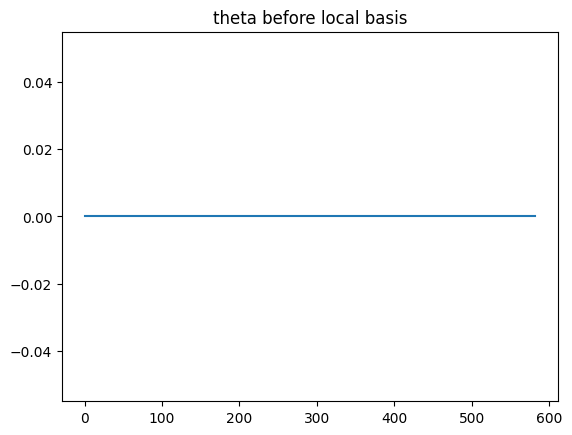

Energy ratio (efficiency): 0.3403020965070415
Total energy: 91.25174983200358
Total energy per dipole: 91.25174983200358
Ix Iy ratio = nan
Energy from Ix 89.89282051489866
Energy from Iy 1.3589293171048997
X/Y energy ratio = 66.14973963944556
maxr 0.0038
84 escaped out of 583


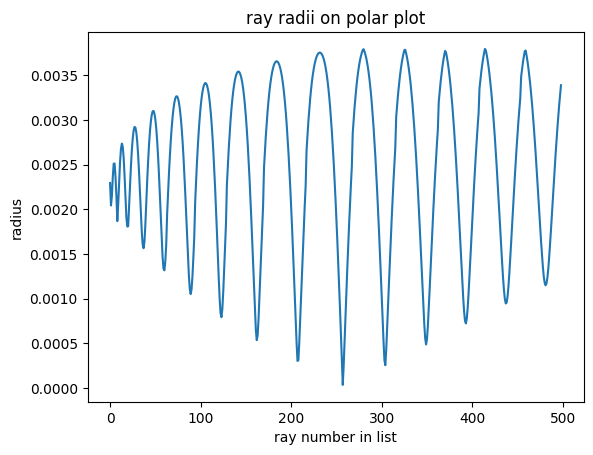

Saved checkpoint with 10000 rays


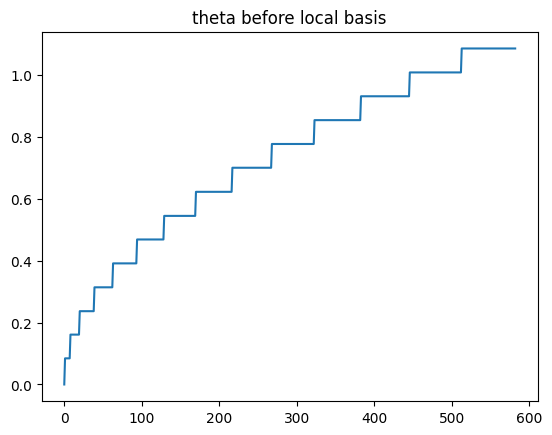

84 escaped out of 583


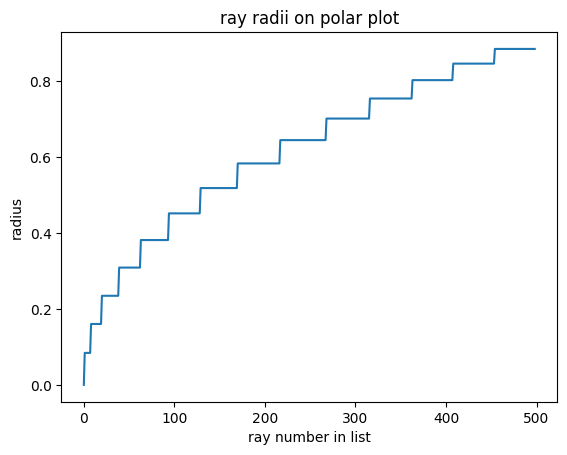

time in trace_rays 5.254794s
ray count 499
scale range in _plot_unstructured None
min for scale 0.0
max for scale 1.4047329552261514
Filling background of polar plot with zeroes!
max_r_in 0 max_r 0.0037534172361123512


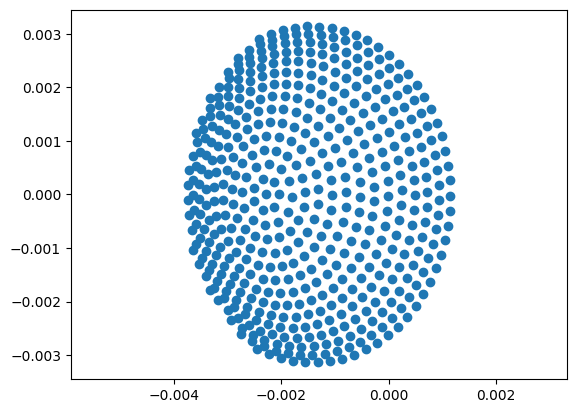

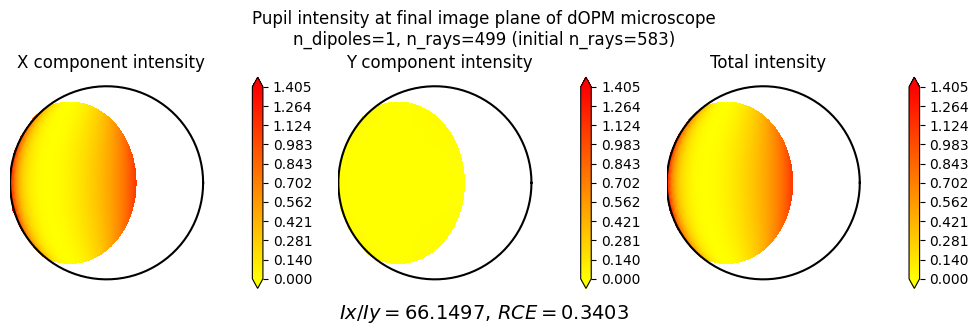

In [3]:
import sys

if '..//' not in sys.path:
    sys.path.append('..//')

from opmsim.optical_system_base import OpticalSystem
from opmsim import optical_elements
from opmsim import dipole_source
import numpy as np
from matplotlib import pyplot as plt
import sys

%matplotlib inline 
#notebook

np.set_printoptions(threshold=sys.maxsize)
dipole_count = 50

options = {
    'ray_count': 1000,
    'draw_rays': False,
    'max_rays_stored': 10000,
}

plot_options = {
    'title': 'Pupil intensity at final image plane of dOPM microscope',
    'add_sim_details': True,
    'max_r_in': 0,
    'scale_range': None# [0,0.3]
}

opm_angle = 35*np.pi/180

O1 = optical_elements.SineLens(NA=1.2, focal_length=0.180/60, n=1.33)
TL1 = optical_elements.SineLens(NA=0.1, focal_length=0.180, n=1)
O2 = optical_elements.SineLens(NA=0.95, focal_length=0.200/50, n=1)
O2_mirr = optical_elements.SineLens(NA=0.95, focal_length=0.200/50, n=1, update_history=True)#,trace_after=False)

TL2 = optical_elements.SineLens(NA=0.1, focal_length=0.160, n=1)
O3 = optical_elements.SineLens(1.2, focal_length=0.180/60, n=1.33, yAxis_rotation=opm_angle)
TL3 = optical_elements.SineLens(NA=0.1, focal_length=0.162, n=1)

diag = optical_elements.DiagonalMatrix(-1)

HWP = optical_elements.WavePlate(np.pi/4, np.pi)
QWP = optical_elements.WavePlate(np.pi/4, np.pi/2)
QWP2 = optical_elements.WavePlate(-np.pi/4, np.pi/2)

LP = optical_elements.LinearPolariser(0)
LP2 = optical_elements.LinearPolariser(np.pi/2)


AgSiO2_mirror = optical_elements.FlatMirror(opm_angle/2, 158e-9, perfect_mirror=True, reflectance=1,\
                                            fresnel_debug_savedir="C:/Users/lnr19/code/OPMsim/output")

elements = [O2, O2_mirr, AgSiO2_mirror]#, O2_mirr]

#elements = [O1, TL1, TL2, O2_mirr, AgSiO2_mirror]#, O2_mirr]
elements = [O1, TL1, TL2, LP, QWP, O2_mirr, AgSiO2_mirror,O2_mirr, QWP]
elements = [O1, TL1, TL2, LP, O2_mirr,AgSiO2_mirror,O2_mirr]
# elements = [O1, TL1, TL2, LP, O2, O3]
# elements = [O1, TL1, TL2, LP2, O2, O3]
# elements = [O1, QWP, QWP]
#elements = [O1, TL1, TL2, LP, QWP, O2_mirr, AgSiO2_mirror, O2_mirr, QWP]#, LP2]
#elements = [O1, TL1, TL2, O2_mirr, AgSiO2_mirror, O2_mirr]#, TL2, TL2]

# PerfectRightAngleMirror
source = dipole_source.DipoleSource()
source.add_dipoles((0,np.pi/2))
# source.add_dipoles((0,0))

# source.generate_dipoles(dipole_count)
# source.classical_photoselection((np.pi/2,0))

system = OpticalSystem("mirror test system", elements, source, options)

system.trace()

system.plot_pupil(plot_options)

In [1]:
from opmsim.optical_system_base import OpticalSystem
from opmsim import optical_elements
from opmsim import dipole_source
import numpy as np
from matplotlib import pyplot as plt
import sys
# %matplotlib widget

np.set_printoptions(threshold=sys.maxsize)
dipole_count = 100

options = {
    'ray_count': 100
}

plot_options = {
    'title': 'Pupil intensity at final image plane of dOPM microscope',
    'add_sim_details': True
}

opm_angle = 45*np.pi/180

O1 = optical_elements.SineLens(NA=1.2, focal_length=0.180/60, n=1.33)
TL1 = optical_elements.SineLens(NA=1, focal_length=0.180, n=1)
O2 = optical_elements.SineLens(NA=0.95, focal_length=0.200/50, n=1)
TL2 = optical_elements.SineLens(NA=1, focal_length=0.160, n=1)
O3 = optical_elements.SineLens(1.2, focal_length=0.180/60, n=1.33)
TL3 = optical_elements.SineLens(NA=1, focal_length=0.162, n=1)

AgSiO2_mirror = optical_elements.FlatMirror(opm_angle, 158e-6,\
    "../refractive_index_data/SiO2.txt", "../refractive_index_data/Ag.txt")

HWP1 = optical_elements.WavePlate(0, np.pi)  # into PBS
HWP2 = optical_elements.WavePlate(np.pi/2, np.pi)  # reflected out of PBS
QWP = optical_elements.WavePlate(np.pi/4, np.pi/2)

elements = [O1, TL1, TL2, O2, HWP1, QWP, AgSiO2_mirror, O2, QWP, HWP2, TL2]

source = dipole_source.DipoleSource()
source.generate_dipoles(dipole_count)
source.classical_photoselection((0,0))

system = OpticalSystem("dOPM system", elements, source, options)

system.trace()

system.plot_pupil(plot_options)




ModuleNotFoundError: No module named 'opmsim'

In [ ]:
import optical_matrices

r_p, r_s = optical_matrices.compute_fresnel_protected_mirror(theta_i, n_film_complex, film_thickness, n_metal_complex, wavelength)
